Once deleted, variables cannot be recovered. Proceed (y/[n])? y


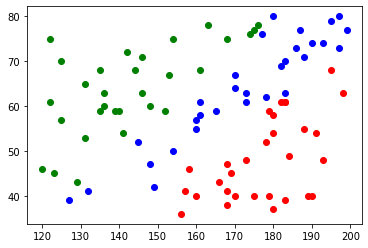

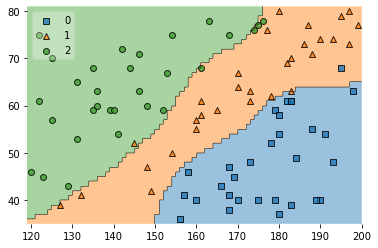

In [10]:
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

# training data set
df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# matplotlib을 이용해서 t_data가 0인 경우 red점으로,
# t_data가 1인경우 blue점으로, t_data가 2인경우 green점으로 표현
# 총 20000개 중에 각각 30개씩만 뽑아서 그래프를 그려보아요!

num_of_sample = 30

x_data_red = x_data[t_data==0][:num_of_sample]
t_data_red = t_data[t_data==0][:num_of_sample]

x_data_blue = x_data[t_data==1][:num_of_sample]
t_data_blue = t_data[t_data==1][:num_of_sample]

x_data_green = x_data[t_data==2][:num_of_sample]
t_data_green = t_data[t_data==2][:num_of_sample]

plt.scatter(x_data_red[:,0],x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0],x_data_blue[:,1], color='b')
plt.scatter(x_data_green[:,0],x_data_green[:,1], color='g')

plt.show()

x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green), axis=0)

# sklearn 구현
model = SVC(C=0.001, 
            gamma=0.01, 
            kernel='rbf')
model.fit(x_data_sample,t_data_sample)

plot_decision_regions(X=x_data_sample,
                      y=t_data_sample,
                      clf=model,
                      legend=2)

plt.show()

In [12]:
%reset 

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# training data set
df = pd.read_csv('./data/mnist/train.csv')

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

model = SVC()
model.fit(x_data_train_norm,t_data_train)

result = model.predict(x_data_test_norm)
print(classification_report(t_data_test,result))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1242
           1       0.98      0.98      0.98      1429
           2       0.96      0.98      0.97      1276
           3       0.98      0.96      0.97      1298
           4       0.97      0.97      0.97      1236
           5       0.97      0.98      0.97      1119
           6       0.98      0.98      0.98      1243
           7       0.98      0.96      0.97      1334
           8       0.97      0.97      0.97      1204
           9       0.96      0.96      0.96      1219

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [18]:
%reset

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# training data set
df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# matplotlib을 이용해서 t_data가 0인 경우 red점으로,
# t_data가 1인경우 blue점으로, t_data가 2인경우 green점으로 표현
# 총 20000개 중에 각각 30개씩만 뽑아서 그래프를 그려보아요!

num_of_sample = 30

x_data_red = x_data[t_data==0][:num_of_sample]
t_data_red = t_data[t_data==0][:num_of_sample]

x_data_blue = x_data[t_data==1][:num_of_sample]
t_data_blue = t_data[t_data==1][:num_of_sample]

x_data_green = x_data[t_data==2][:num_of_sample]
t_data_green = t_data[t_data==2][:num_of_sample]

x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green), axis=0)

# sklearn 구현
model = SVC()

param = [
    {'kernel': ['linear'],
     'C' : [10,50,100,500,1000,5000]},
    {'kernel': ['rbf'],
     'C' : [1, 5, 10, 50, 100, 500, 1000, 5000],
     'gamma': [0.01, 0.005, 0.1, 0.5, 1, 5, 10, 50]}
]

grid_search = GridSearchCV(model,
                           param,
                           cv=5,
                           scoring='accuracy',
                           verbose=2)

grid_search.fit(x_data_sample,t_data_sample)

print(grid_search.best_params_)
print(grid_search.best_score_)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=50, kernel=linear .............................................
[CV] .............................. C=50, kernel=linear, total=   0.0s
[CV] C=50, kernel=line

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV] ..................... C=5, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=5, gamma=0.005, kernel=rbf ....................................
[CV] .

[CV] ..................... C=50, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.005, kernel=rbf ...................................
[CV] .................... C=50, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=50, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=50, gamma=0.1, kernel=rbf .....................................
[CV] .

[CV] C=500, gamma=0.005, kernel=rbf ..................................
[CV] ................... C=500, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.005, kernel=rbf ..................................
[CV] ................... C=500, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.005, kernel=rbf ..................................
[CV] ................... C=500, gamma=0.005, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=500, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=500, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C

[CV] .................... C=5000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.5, kernel=rbf ...................................
[CV] .................... C=5000, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.5, kernel=rbf ...................................
[CV] .................... C=5000, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.5, kernel=rbf ...................................
[CV] .................... C=5000, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.5, kernel=rbf ...................................
[CV] .................... C=5000, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=0.5, kernel=rbf ...................................
[CV] .................... C=5000, gamma=0.5, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=5000, gamma=1, kernel=rbf, total=   0.0s
[CV] C=5000, gamma=1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.7s finished


In [19]:
%reset

import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# training data set
df = pd.read_csv('./data/bmi.csv', skiprows=3)

x_data = df[['height', 'weight']].values
t_data = df['label'].values

# matplotlib을 이용해서 t_data가 0인 경우 red점으로,
# t_data가 1인경우 blue점으로, t_data가 2인경우 green점으로 표현
# 총 20000개 중에 각각 30개씩만 뽑아서 그래프를 그려보아요!

num_of_sample = 30

x_data_red = x_data[t_data==0][:num_of_sample]
t_data_red = t_data[t_data==0][:num_of_sample]

x_data_blue = x_data[t_data==1][:num_of_sample]
t_data_blue = t_data[t_data==1][:num_of_sample]

x_data_green = x_data[t_data==2][:num_of_sample]
t_data_green = t_data[t_data==2][:num_of_sample]

x_data_sample = np.concatenate((x_data_red,x_data_blue,x_data_green), axis=0)
t_data_sample = np.concatenate((t_data_red,t_data_blue,t_data_green), axis=0)

# sklearn 구현
model = SVC()

param = {
    'kernel': ['linear','rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0) 
}

random_search = RandomizedSearchCV(model,
                           param,
                           cv=5,
                           n_iter=100,
                           scoring='accuracy',
                           verbose=2)

random_search.fit(x_data_sample,t_data_sample)

print(random_search.best_params_)
print(random_search.best_score_)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=116.62886347574295, gamma=1.4180833200755893, kernel=linear ...
[CV]  C=116.62886347574295, gamma=1.4180833200755893, kernel=linear, total=   0.0s
[CV] C=116.62886347574295, gamma=1.4180833200755893, kernel=linear ...
[CV]  C=116.62886347574295, gamma=1.4180833200755893, kernel=linear, total=   0.0s
[CV] C=116.62886347574295, gamma=1.4180833200755893, kernel=linear ...
[CV]  C=116.62886347574295, gamma=1.4180833200755893, kernel=linear, total=   0.0s
[CV] C=116.62886347574295, gamma=1.4180833200755893, kernel=linear ...
[CV]  C=116.62886347574295, gamma=1.4180833200755893, kernel=linear, total=   0.0s
[CV] C=116.62886347574295, gamma=1.4180833200755893, kernel=linear ...
[CV]  C=116.62886347574295, gamma=1.4180833200755893, kernel=linear, total=   0.0s
[CV] C=22.29197754848052, gamma=1.014762972929561, kernel=rbf ........
[CV]  C=22.29197754848052, gamma

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear ...
[CV]  C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear, total=   0.0s
[CV] C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear ...
[CV]  C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear, total=   0.0s
[CV] C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear ...
[CV]  C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear, total=   0.0s
[CV] C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear ...
[CV]  C=1497.7083336343999, gamma=0.7219129584078646, kernel=linear, total=   0.0s
[CV] C=154589.9671434908, gamma=1.1060159188274707, kernel=rbf .......
[CV]  C=154589.9671434908, gamma=1.1060159188274707, kernel=rbf, total=   0.0s
[CV] C=154589.9671434908, gamma=1.1060159188274707, kernel=rbf .......
[CV]  C=154589.9671434908, gamma=1.1060159188274707, kernel=rbf, total=   0.0s
[CV] C=154589.9671434908, gamma=1.1060159188274707, kernel=rbf .......
[CV]  C=1545

[CV]  C=109.99307985810918, gamma=0.0335467469120773, kernel=linear, total=   0.0s
[CV] C=109.99307985810918, gamma=0.0335467469120773, kernel=linear ...
[CV]  C=109.99307985810918, gamma=0.0335467469120773, kernel=linear, total=   0.0s
[CV] C=645.2506578528175, gamma=0.9550145435966474, kernel=linear ....
[CV]  C=645.2506578528175, gamma=0.9550145435966474, kernel=linear, total=   0.0s
[CV] C=645.2506578528175, gamma=0.9550145435966474, kernel=linear ....
[CV]  C=645.2506578528175, gamma=0.9550145435966474, kernel=linear, total=   0.0s
[CV] C=645.2506578528175, gamma=0.9550145435966474, kernel=linear ....
[CV]  C=645.2506578528175, gamma=0.9550145435966474, kernel=linear, total=   0.0s
[CV] C=645.2506578528175, gamma=0.9550145435966474, kernel=linear ....
[CV]  C=645.2506578528175, gamma=0.9550145435966474, kernel=linear, total=   0.0s
[CV] C=645.2506578528175, gamma=0.9550145435966474, kernel=linear ....
[CV]  C=645.2506578528175, gamma=0.9550145435966474, kernel=linear, total=   0.0

[CV]  C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf, total=   0.0s
[CV] C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf ......
[CV]  C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf, total=   0.0s
[CV] C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf ......
[CV]  C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf, total=   0.0s
[CV] C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf ......
[CV]  C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf, total=   0.0s
[CV] C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf ......
[CV]  C=113517.77542483734, gamma=0.7158255240438622, kernel=rbf, total=   0.0s
[CV] C=15349.03797439925, gamma=1.2246097396211906, kernel=linear ....
[CV]  C=15349.03797439925, gamma=1.2246097396211906, kernel=linear, total=   0.0s
[CV] C=15349.03797439925, gamma=1.2246097396211906, kernel=linear ....
[CV]  C=15349.03797439925, gamma=1.2246097396211906, kernel=linear, total=   0.0s
[CV] C=153

[CV] C=6720.5860557278975, gamma=0.6452842883581817, kernel=linear ...
[CV]  C=6720.5860557278975, gamma=0.6452842883581817, kernel=linear, total=   0.0s
[CV] C=101.91844056377052, gamma=1.141755293407903, kernel=rbf .......
[CV]  C=101.91844056377052, gamma=1.141755293407903, kernel=rbf, total=   0.0s
[CV] C=101.91844056377052, gamma=1.141755293407903, kernel=rbf .......
[CV]  C=101.91844056377052, gamma=1.141755293407903, kernel=rbf, total=   0.0s
[CV] C=101.91844056377052, gamma=1.141755293407903, kernel=rbf .......
[CV]  C=101.91844056377052, gamma=1.141755293407903, kernel=rbf, total=   0.0s
[CV] C=101.91844056377052, gamma=1.141755293407903, kernel=rbf .......
[CV]  C=101.91844056377052, gamma=1.141755293407903, kernel=rbf, total=   0.0s
[CV] C=101.91844056377052, gamma=1.141755293407903, kernel=rbf .......
[CV]  C=101.91844056377052, gamma=1.141755293407903, kernel=rbf, total=   0.0s
[CV] C=1647.886266658941, gamma=0.05023925706739346, kernel=linear ...
[CV]  C=1647.886266658941

[CV]  C=683.3647832800067, gamma=0.21051215423471928, kernel=linear, total=   0.0s
[CV] C=683.3647832800067, gamma=0.21051215423471928, kernel=linear ...
[CV]  C=683.3647832800067, gamma=0.21051215423471928, kernel=linear, total=   0.0s
[CV] C=683.3647832800067, gamma=0.21051215423471928, kernel=linear ...
[CV]  C=683.3647832800067, gamma=0.21051215423471928, kernel=linear, total=   0.0s
[CV] C=138488.5797093176, gamma=0.154826291924253, kernel=linear .....
[CV]  C=138488.5797093176, gamma=0.154826291924253, kernel=linear, total=   0.0s
[CV] C=138488.5797093176, gamma=0.154826291924253, kernel=linear .....
[CV]  C=138488.5797093176, gamma=0.154826291924253, kernel=linear, total=   0.0s
[CV] C=138488.5797093176, gamma=0.154826291924253, kernel=linear .....
[CV]  C=138488.5797093176, gamma=0.154826291924253, kernel=linear, total=   0.0s
[CV] C=138488.5797093176, gamma=0.154826291924253, kernel=linear .....
[CV]  C=138488.5797093176, gamma=0.154826291924253, kernel=linear, total=   0.0s
[

[CV]  C=2627.9050212194584, gamma=0.7975484542874497, kernel=linear, total=   0.0s
[CV] C=2627.9050212194584, gamma=0.7975484542874497, kernel=linear ...
[CV]  C=2627.9050212194584, gamma=0.7975484542874497, kernel=linear, total=   0.0s
[CV] C=11688.304494099391, gamma=0.7808307964097616, kernel=linear ...
[CV]  C=11688.304494099391, gamma=0.7808307964097616, kernel=linear, total=   0.0s
[CV] C=11688.304494099391, gamma=0.7808307964097616, kernel=linear ...
[CV]  C=11688.304494099391, gamma=0.7808307964097616, kernel=linear, total=   0.0s
[CV] C=11688.304494099391, gamma=0.7808307964097616, kernel=linear ...
[CV]  C=11688.304494099391, gamma=0.7808307964097616, kernel=linear, total=   0.0s
[CV] C=11688.304494099391, gamma=0.7808307964097616, kernel=linear ...
[CV]  C=11688.304494099391, gamma=0.7808307964097616, kernel=linear, total=   0.0s
[CV] C=11688.304494099391, gamma=0.7808307964097616, kernel=linear ...
[CV]  C=11688.304494099391, gamma=0.7808307964097616, kernel=linear, total= 

[CV]  C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf, total=   0.0s
[CV] C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf .......
[CV]  C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf, total=   0.0s
[CV] C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf .......
[CV]  C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf, total=   0.0s
[CV] C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf .......
[CV]  C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf, total=   0.0s
[CV] C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf .......
[CV]  C=2694.4132019736367, gamma=1.050305732849858, kernel=rbf, total=   0.0s
{'C': 116.62886347574295, 'gamma': 1.4180833200755893, 'kernel': 'linear'}
0.9333333333333333


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished
